# Heatmap for each class of effector using CNN-LSTM models (convolutional layer 4 - concatenated layer)

In this report, heatmap of last convolutional layer in CNN-LSTM Network will be showed. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from tensorflow.compat.v1.keras.models import load_model

In [2]:
import cv2
import glob

In [4]:
# Get the pretarined model and show the summary of the model
model_cnn_lstm = load_model("../../../data/getting-data-new/multi-class-data/data-sets/models/bacteria/cnn-lstm/model_1.30-0.41.hdf5")
model_cnn_lstm.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4034, 20)]   0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 4034, 4)      80          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 4032, 4)      240         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 4030, 4)      400         input_1[0][0]                    
____________________________________________________________________________________________

# Function

In [5]:
# Load datasets
dataset = np.load('../../../data/getting-data-new/multi-class-data/data-sets/bacteria/x_train.npy')

In [9]:
dataset.shape[1]

4034

In [31]:
def get_sum_heatmap_from_files(data_name, class_eff, layer, verbose = True, dataset = dataset):
    npy_loading_pattern = "heatmaps-data/results/cnn_lstm/all_matrices_" + class_eff + "_" + data_name + "_" + layer + "*.npy"
    data_loading_path = glob.glob(npy_loading_pattern)
    
    if verbose: print("Loading", data_name, "data from", len(data_loading_path) ,"files...")
    
    # Initalize empty matrix
    all_matrices = np.empty([0 , 1, np.load(data_loading_path[0]).shape[2]])

    # Append matrices from files
    for path in data_loading_path:
        data = np.load(path)
        all_matrices = np.concatenate((all_matrices, data))
        
    if verbose: print("Loaded", all_matrices.shape[0], "data samples")
    sum_all_matrices = np.sum(all_matrices, axis = 0)
    
    # Calculate heatmap
    heatmap = np.maximum(sum_all_matrices, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (dataset.shape[1], dataset.shape[2]))

    
    return(heatmap)

In [23]:
def plot_heatmap(data, from_data, to_data, colorbar = None):
    plt.matshow(data[:,from_data:to_data], cmap = 'viridis', origin = "lower", vmin = 0, vmax = 1)
    ax = plt.gca()
    plot = ax.axes.get_yaxis().set_visible(False)
    if colorbar == "Yes":
        plt.colorbar()
    
    return plot

# Bacteria

In [55]:
x_train_bacteria = get_sum_heatmap_from_files("x_train",  "bacteria", "conv1d_4")

Loading x_train data from 10 files...
Loaded 228 data samples


In [24]:
x_val_bacteria = get_sum_heatmap_from_files("x_val", "bacteria", "conv1d_4")

Loading x_val data from 4 files...
Loaded 76 data samples


In [32]:
x_test_bacteria = get_sum_heatmap_from_files("x_test", "bacteria", "conv1d_4")

Loading x_test data from 4 files...
Loaded 76 data samples


### Heatmap of training data

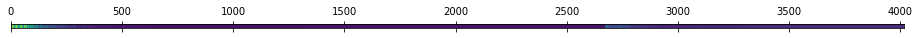

In [56]:
plot_heatmap(x_train_bacteria, x_train_bacteria.shape[0], x_train_bacteria.shape[1])

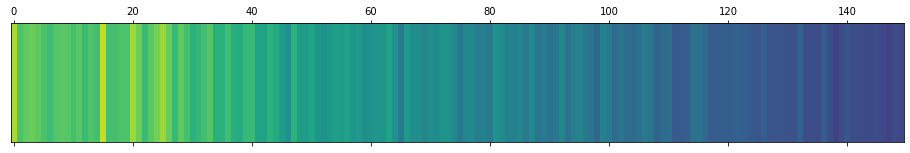

In [34]:
plot_heatmap(x_train_bacteria, 0, 150)

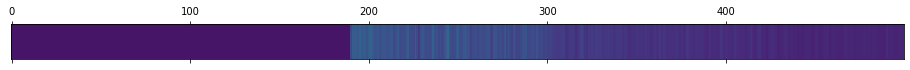

In [57]:
plot_heatmap(x_train_bacteria, 2500, 3000)

### Heatmap of validation data

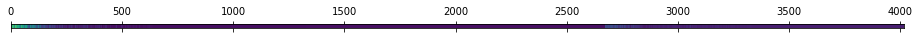

In [35]:
plot_heatmap(x_val_bacteria, x_val_bacteria.shape[0], x_val_bacteria.shape[1])

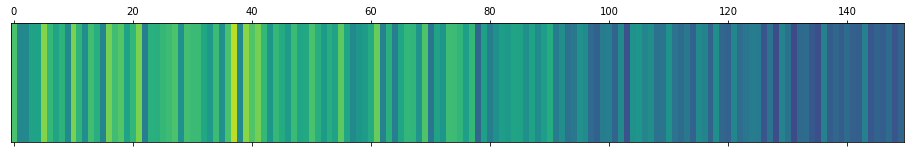

In [36]:
plot_heatmap(x_val_bacteria, 0, 150)

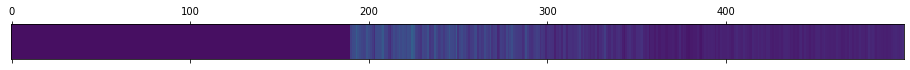

In [53]:
plot_heatmap(x_val_bacteria, 2500, 3000)

### Heatmap of testing data

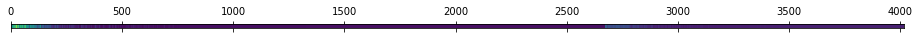

In [37]:
plot_heatmap(x_test_bacteria, x_test_bacteria.shape[0], x_test_bacteria.shape[1])

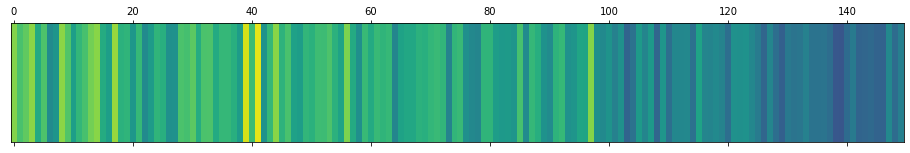

In [38]:
plot_heatmap(x_test_bacteria, 0, 150)

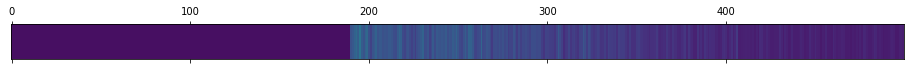

In [52]:
plot_heatmap(x_test_bacteria, 2500, 3000)

# Fungi

In [58]:
# x_train_fungi = get_sum_heatmap_from_files("x_train", "fungi", "conv1d_4")

In [46]:
x_val_fungi = get_sum_heatmap_from_files("x_val", "fungi", "conv1d_4")

Loading x_val data from 2 files...
Loaded 45 data samples


In [47]:
x_test_fungi = get_sum_heatmap_from_files("x_test", "fungi", "conv1d_4")

Loading x_test data from 2 files...
Loaded 44 data samples


### Heatmap of validation data

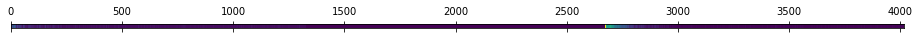

In [48]:
plot_heatmap(x_val_fungi, x_val_fungi.shape[0], x_val_fungi.shape[1])

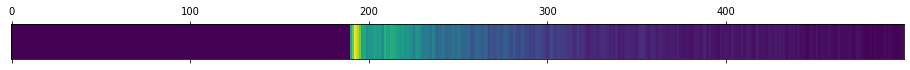

In [49]:
plot_heatmap(x_val_fungi, 2500, 3000)

### Heatmap of testing data

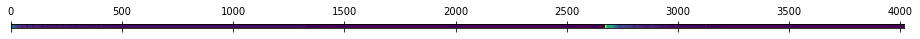

In [50]:
plot_heatmap(x_test_fungi, x_test_fungi.shape[0], x_test_fungi.shape[1])

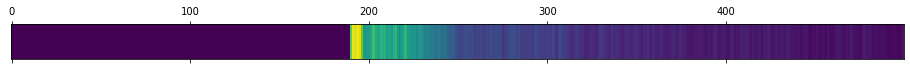

In [51]:
plot_heatmap(x_test_fungi, 2500, 3000)

# Oomycete

In [32]:
# x_train_oomycete = get_sum_heatmap_from_files("x_train", "oomycete", "conv1d_4")

Loading x_train data from 5 files...
Loaded 114 data samples


In [59]:
x_val_oomycete = get_sum_heatmap_from_files("x_val", "oomycete", "conv1d_4")

Loading x_val data from 2 files...
Loaded 38 data samples


In [60]:
x_test_oomycete = get_sum_heatmap_from_files("x_test", "oomycete", "conv1d_4")

Loading x_test data from 2 files...
Loaded 38 data samples


### Heatmap of training data

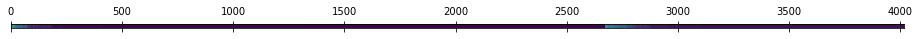

In [36]:
# plot_heatmap(x_train_oomycete, x_train_oomycete.shape[0], x_train_oomycete.shape[1])

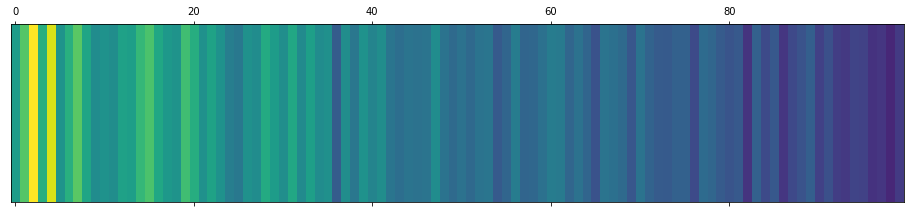

In [39]:
# plot_heatmap(x_train_oomycete, 0, 100)

### Heatmap of validation data

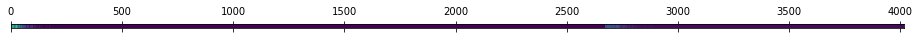

In [61]:
plot_heatmap(x_val_oomycete, x_val_oomycete.shape[0], x_val_oomycete.shape[1])

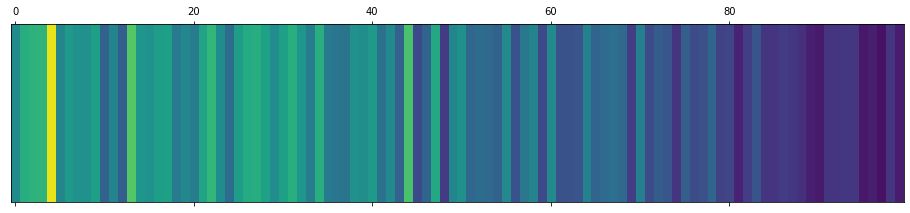

In [63]:
plot_heatmap(x_val_oomycete, 0, 100)

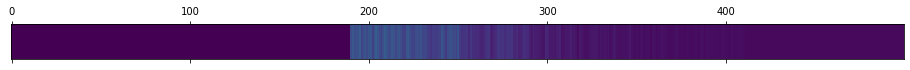

In [64]:
plot_heatmap(x_val_oomycete, 2500, 3000)

### Heatmap of testing data

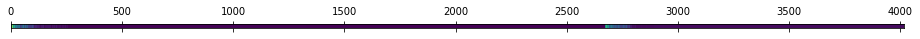

In [65]:
plot_heatmap(x_test_oomycete, x_test_oomycete.shape[0], x_test_oomycete.shape[1])

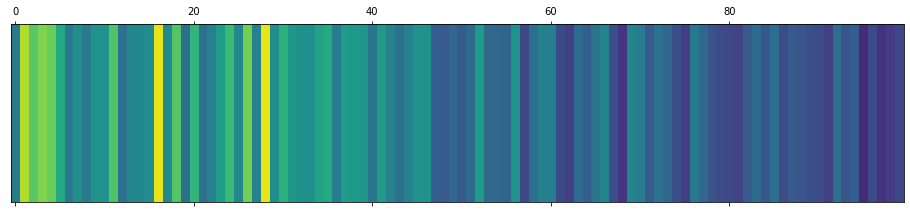

In [66]:
plot_heatmap(x_test_oomycete, 0, 100)

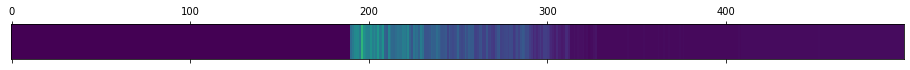

In [67]:
plot_heatmap(x_test_oomycete, 2500, 3000)